In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import awkward as ak
import uproot 
import mplhep as hep
import hist
import os
import time

from UtilityAndConst import *
from Functions import *

dir = "/Users/francescolarovere/Documents/Tesi-Triennale/Dati"
os.chdir(dir)

hep.style.use("CMS")
np.set_printoptions(threshold=np.inf)

In [4]:
LS133 = "./ntupleStubsBmtfGmt_LS133.root"
LS263 = "./ntupleStubsBmtfGmt_LS263.root"
LS264 = "./ntupleStubsBmtfGmt_LS264.root"
LS306 = "./ntupleStubsBmtfGmt_LS306.root"

#Open file
stubs_awk_LS133 = OpenRootFile(LS133, stub_features)
stubs_awk_LS263 = OpenRootFile(LS263, stub_features)
stubs_awk_LS264 = OpenRootFile(LS264, stub_features)
stubs_awk_LS306 = OpenRootFile(LS306, stub_features)

gmt_awk_LS133 = OpenRootFile(LS133, gmt_features)
gmt_awk_LS263 = OpenRootFile(LS263, gmt_features)
gmt_awk_LS264 = OpenRootFile(LS264, gmt_features)
gmt_awk_LS306 = OpenRootFile(LS306, gmt_features)

bmtf_awk_LS133 = OpenRootFile(LS133, bmtf_features)
bmtf_awk_LS263 = OpenRootFile(LS263, bmtf_features)
bmtf_awk_LS264 = OpenRootFile(LS264, bmtf_features)
bmtf_awk_LS306 = OpenRootFile(LS306, bmtf_features)

# Molteplicità di Stub per GMT

In [5]:
#Caricamenot BX delle stubs
BX_LS133 = stubs_awk_LS133.bx
BX_LS263 = stubs_awk_LS263.bx
BX_LS264 = stubs_awk_LS264.bx
BX_LS306 = stubs_awk_LS306.bx

#Caricamento muoni di GMT
nGmtMuons_LS133 = gmt_awk_LS133.nGmtMuons
nGmtMuons_LS263 = gmt_awk_LS263.nGmtMuons
nGmtMuons_LS264 = gmt_awk_LS264.nGmtMuons
nGmtMuons_LS306 = gmt_awk_LS306.nGmtMuons

nBmtfMuons_LS133 = bmtf_awk_LS133.nBmtfMuons
nBmtfMuons_LS263 = bmtf_awk_LS263.nBmtfMuons
nBmtfMuons_LS264 = bmtf_awk_LS264.nBmtfMuons
nBmtfMuons_LS306 = bmtf_awk_LS306.nBmtfMuons

In [6]:
nGmtLS133_count = ConvertToHz(np.bincount(nGmtMuons_LS133))
nGmtLS263_count = ConvertToHz(np.bincount(nGmtMuons_LS263))
nGmtLS264_count = ConvertToHz(np.bincount(nGmtMuons_LS264))
nGmtLS306_count = ConvertToHz(np.bincount(nGmtMuons_LS306))

nGmt_Array = ak.Array([nGmtLS133_count, nGmtLS263_count, nGmtLS264_count, nGmtLS306_count])

MaxStubs = max(len(nGmt_Array[0]), len(nGmt_Array[1]), len(nGmt_Array[2]), len(nGmt_Array[3]))

#Filled Array per eseguire una somma vettoriale dei 4 array
FnGmtLS133 = ak.fill_none(ak.pad_none(nGmt_Array[0], MaxStubs, axis = 0, clip=True), 0)
FnGmtLS263 = ak.fill_none(ak.pad_none(nGmt_Array[1], MaxStubs, axis = 0, clip=True), 0)
FnGmtLS264 = ak.fill_none(ak.pad_none(nGmt_Array[2], MaxStubs, axis = 0, clip=True), 0)
FnGmtLS306 = ak.fill_none(ak.pad_none(nGmt_Array[3], MaxStubs, axis = 0, clip=True), 0)

nGmt = FnGmtLS133 + FnGmtLS263 + FnGmtLS264 + FnGmtLS306


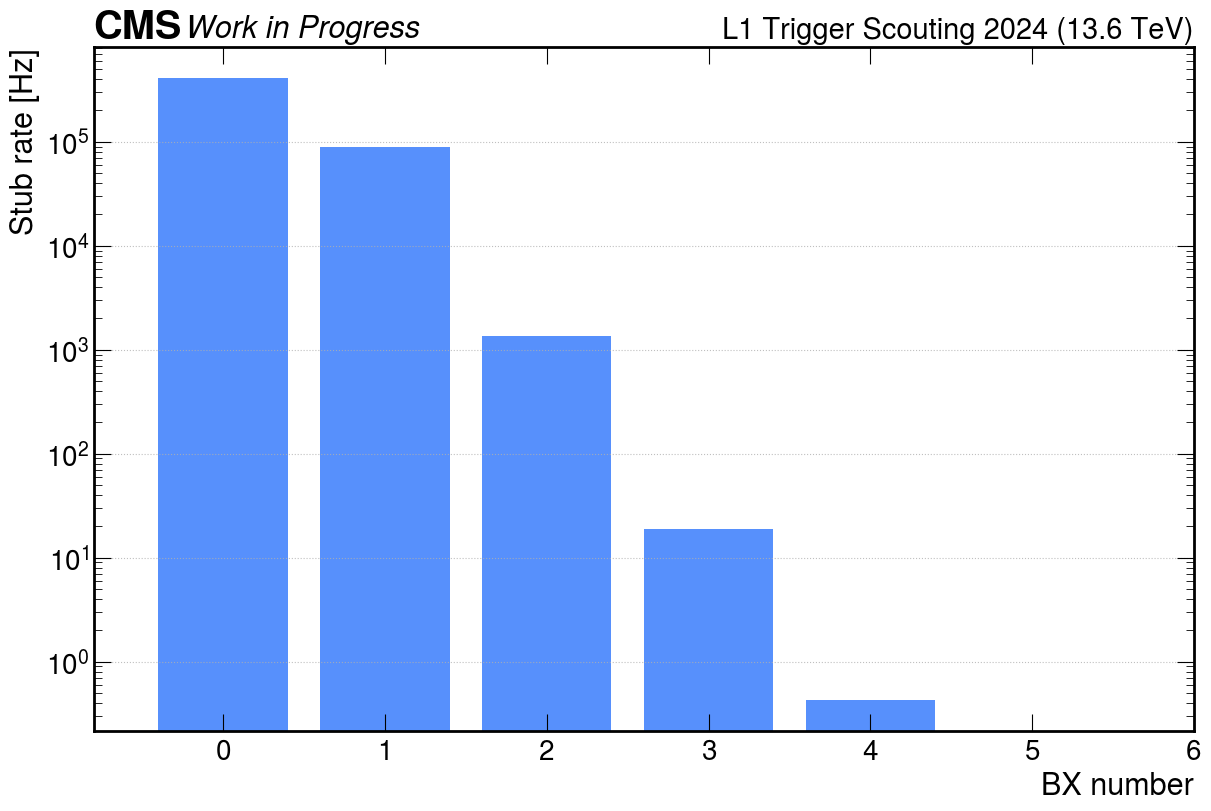

In [7]:
fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

ax.bar(np.arange(len(nGmt[:])), nGmt[:])

#ax.set_xticks(ticks=np.arange(9), labels=np.arange(1, 10, 1))
ax.tick_params(axis='x', which='minor', length=0)
ax.set_xlabel('BX number')
ax.set_ylabel('Stub rate [Hz]')
ax.set_xlim(-0.8, 6)
ax.grid(visible=True, axis='y')
ax.set_yscale('log')

# $\Delta R$

Per ora uso il secondo metodo nel CERNSummerSchoolReport

In [8]:
#Carico dati per GMT
GmtPhi_LS133 = gmt_awk_LS133.gmtPhi
GmtPhi_LS263 = gmt_awk_LS263.gmtPhi
GmtPhi_LS264 = gmt_awk_LS264.gmtPhi
GmtPhi_LS306 = gmt_awk_LS306.gmtPhi

GmtEta_LS133 = gmt_awk_LS133.gmtEta
GmtEta_LS263 = gmt_awk_LS263.gmtEta
GmtEta_LS264 = gmt_awk_LS264.gmtEta
GmtEta_LS306 = gmt_awk_LS306.gmtEta

#Carico dati per BMTF

BmtfEta_LS133 = bmtf_awk_LS133.bmtfEta
BmtfEta_LS263 = bmtf_awk_LS263.bmtfEta
BmtfEta_LS264 = bmtf_awk_LS264.bmtfEta
BmtfEta_LS306 = bmtf_awk_LS306.bmtfEta

BmtfPhi_LS133 = bmtf_awk_LS133.bmtfPhi
BmtfPhi_LS263 = bmtf_awk_LS263.bmtfPhi
BmtfPhi_LS264 = bmtf_awk_LS264.bmtfPhi
BmtfPhi_LS306 = bmtf_awk_LS306.bmtfPhi


Test: andranno poi convertiti in funzioni

In [14]:
indexGMT = []

for i in range(100):
  if (nGmtMuons_LS263[i] > 0):
    indexGMT.append(i)


print(len(indexGMT))
print(indexGMT)



#for i in range(len(indexGMT)):
i = 12
print(BmtfEta_LS263[i], "\t", GmtEta_LS263[i])


18
[3, 6, 10, 12, 23, 27, 41, 42, 45, 55, 56, 57, 61, 69, 79, 90, 94, 99]
[0.631] 	 [0.631]


In [8]:
for i in range(100):
  for j in range(nGmtMuons_LS133[i]):
    print(i, "\t", j, "\t", GmtPhi_LS133[i][j])

10 	 0 	 -1.9525875
25 	 0 	 -0.6435903
34 	 0 	 -0.09817488
40 	 0 	 1.3199052
53 	 0 	 2.443461
62 	 0 	 -2.7052603
71 	 0 	 0.5999569
77 	 0 	 2.6834435
78 	 0 	 0.86175627
88 	 0 	 -0.4908741


In [10]:
DeltaR = [[] for _ in range(len(nGmtMuons_LS133))]

for i in range(len(nGmtMuons_LS133)):
  for j in range(nGmtMuons_LS133[i]):
    for k in range(len(BmtfPhi_LS133[i])):

      DeltaPhi = GmtPhi_LS133[i][j] - BmtfPhi_LS133[i][k]
      DeltaEta = GmtEta_LS133[i][j] - BmtfEta_LS133[i][k]
      deltar = np.sqrt(DeltaPhi**2 + DeltaEta**2)

      DeltaR[i].append(deltar)


      #print(i, "\t", j, "\t", k, "\t", GmtPhi_LS133[i][j], "\t", BmtfPhi_LS133[i][k], "\t", DeltaPhi)
      #print(i, "\t", j, "\t", k, "\t", GmtEta_LS133[i][j], "\t", BmtfEta_LS133[i][k], "\t", DeltaEta)

  if(len(DeltaR[i]) > 0):
    DeltaR[i] = [np.min(DeltaR[i])]
    
AKDeltaR = ak.flatten(ak.Array(DeltaR))
  

In [11]:
array = np.array(AKDeltaR)

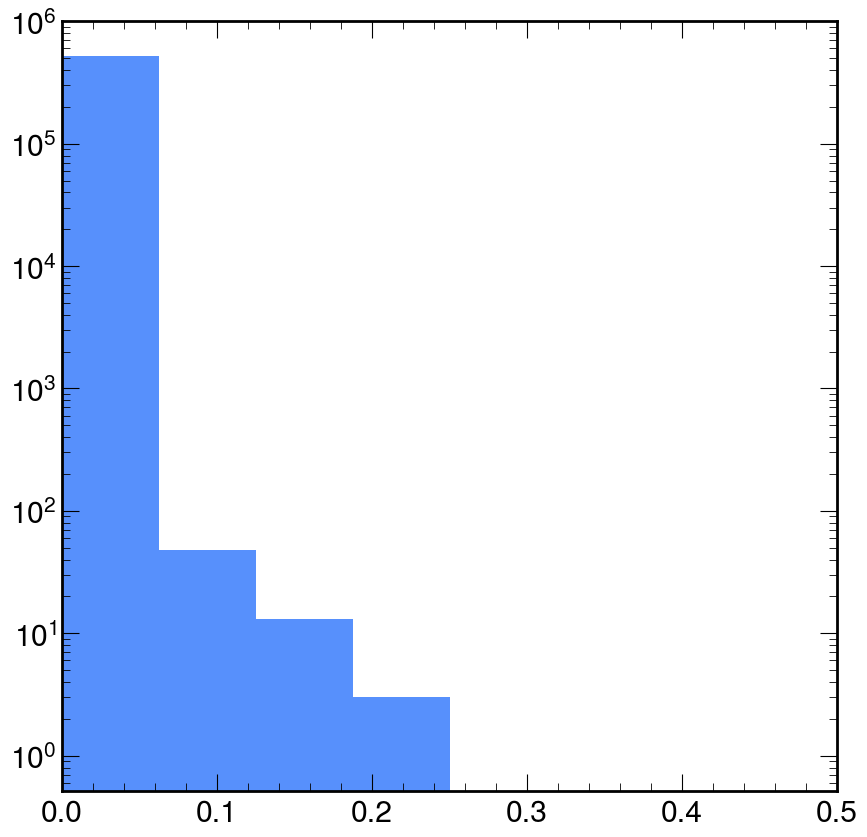

In [16]:
plt.hist(array, bins=100)
plt.yscale('log')
plt.xlim(0, 0.5)
plt.show()


In [21]:
bx_gmt_counts_LS133 = np.bincount(BX_LS133, weights=nGmtMuons_LS133)
bx_gmt_counts_LS263 = np.bincount(BX_LS263, weights=nGmtMuons_LS263)
bx_gmt_counts_LS264 = np.bincount(BX_LS264, weights=nGmtMuons_LS264)
bx_gmt_counts_LS306 = np.bincount(BX_LS306, weights=nGmtMuons_LS306)

print(len(bx_gmt_counts_LS133))
max = np.argmax(nGmtMuons_LS133)

print(BX_LS133[0])

3565
101


In [7]:
'''for a in range(300, 500):
  print(GmtPhi_LS133[a], "\t\t\t", BmtfPhi_LS133[a])'''

print(len(ak.flatten(GmtPhi_LS133)), len(ak.flatten(GmtEta_LS133)))

533216 533216


In [8]:
def DeltaR(DeltaPhi, DeltaEta):
  return np.sqrt(DeltaPhi**2 + DeltaEta**2)